# Data Acquisition
* This file is being used to find an appropriate data source
* Initial exploration of data from multiple sources

# Import Helper Modules

In [1]:
# importing sys
import sys

# adding 00_helper_files to the system path
sys.path.insert(0, '/Users/qmcbt/codeup-data-science/00_helper_files')

# Import Helper Modules
import QMCBT_00_quicktips as qt
import QMCBT_01_acquire as acq
import QMCBT_02_prepare as prep
import QMCBT_03_explore as exp
import QMCBT_04_visualize as viz
import QMCBT_05_model as mod
import QMCBT_wrangle as w

**CUSTOM EXPLORATION FUNCTIONS
nunique_column_all(df): PRINT NUNIQUE OF ALL COLUMNS
nunique_column_objects(df): PRINT NUNIQUE OF COLUMNS THAT ARE OBJECTS
nunique_column_qty(df): PRINT NUNIQUE OF COLUMNS THAT ARE *NOT* OBJECTS
numeric_range(df): COMPUTE RANGE FOR ALL NUMERIC VARIABLES

**USEFUL EXPLORATORY CODE**
DFNAME.head()
DFNAME.shape
DFNAME.shape[0] #read row count
DFNAME.describe().T
DFNAME.columns.to_list()
DFNAME.COLUMNNAME.value_counts(dropna=False)
DFNAME.dtypes
DFNAME.select_dtypes(include='object').columns
DFNAME.select_dtypes(include='float').columns
pd.crosstab(DFNAME.COLUMN-1, DFNAME.COLUMN-2)
**CUSTOM EXPLORATION FUNCTIONS
nunique_column_all(df): PRINT NUNIQUE OF ALL COLUMNS
nunique_column_objects(df): PRINT NUNIQUE OF COLUMNS THAT ARE OBJECTS
nunique_column_qty(df): PRINT NUNIQUE OF COLUMNS THAT ARE *NOT* OBJECTS
numeric_range(df): COMPUTE RANGE FOR ALL NUMERIC VARIABLES

**USEFUL EXPLORATORY CODE**
DFNAME.head()
DFNAME.shape
DFNAME.shape[0] #read row count
DFNAME.desc

In [2]:
url="https://upload.wikimedia.org/wikipedia/en/thumb/1/15/The_Elder_Scrolls_V_Skyrim_cover.png/220px-The_Elder_Scrolls_V_Skyrim_cover.png"
pic1 = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBUVFRgVFRYYGRgaGhwcGhoaGhkaGBwcGhoZHBgcGhocIS4lHB4rHxgcJjgmKy8xNTU1GiQ7QDs0Py40NTEBDAwMEA8QHhISHjQrISs0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NP/AABEIALEBHAMBIgACEQEDEQH/xAAcAAEAAgMBAQEAAAAAAAAAAAAEAwUAAgYHAQj/xABDEAACAQMCBAMFBAcHAgcBAAABAhEAAyESMQQFQVEiYXEGEzKBkUKhsdEUI1JicsHwBzOCkrLh8VPCFUNzg6KjszT/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/xAAjEQEBAAICAwEAAgMBAAAAAAAAAQIRITEDEkEEE1EiYXEF/9oADAMBAAIRAxEAPwCgQUm2ta21pNtajTe2lKtpWltaVbSg3tpSraVpbSlW0ordEpKJWttKVbSiK/nyH9Fvkf8ASf8A0GvBuEtydpiv0df4YOjodmVlPzBH868N9nuXy7o3xKSpHmCQfwqxnJS31jIEfjWluZnbuf8Aiuj5nwGhpwAO+59J6VTOUzOTnvH0rTO/j0f2F9vNGjh+KbUmy3TuvYOTuPOvWrYDAEEEHIIyCPWvyuWAyB+Y8xXW+x/txf4NgrMXs/aRjJA7ofsny2qWNY5a7e/aayKByjndnibYuW2lYBM7iRMEdKlu8wRcapPYb1lsqsoVnmVtl1A4HmOonEb718sc1tOxVGkqYI7UDqyoRxK9D+Vff0lRvt36UEsVmmjW+PRm0g+KJjyqLjObWrZ8TDpJ6Ce9Aw26FzTjrXD22uXnCIoyT+A7nyrd+a2ghfWNIEz+XevCfbn2mucTeZGPgVmCrEAZwfMx1pJtMrpH7Ze1r8c8CUsr8CTk/vN0LfhXNIuJG+0dvuqS3Zkz9eg8qYlliPCNt8Z9Z7V0crWnAcGWYDEnvmrzmvAheHwpBHXoR5VvyHh3L/Ac42q+9rbDpwkMBOPxrNvKycWr72RsBeCsQN0n5mSfxqyupW/JOFKcNZQ7rbUH1gTUt1Ky6RV3Eo1xKsbiUW4lFV1xKK6VY3EolxaCvdahK0y4tQFaIy2tKtrUVtaVbWgmtpS7aVDbWl21oqW2lKtpUdtaXbSiN0SlW0rS2tKtrRUltK8ns8KbXNuItxAZ2ceYcBpH+Y169bSuQ9vOWBHscaogo4t3CP2G+En0bH+KkTL+3n3tlw+m62+kY6z8prnVGPhx5xXpftJZV1GsZJ8JUb/SuM4qwsles9IjHeBmtTpyymqoWXSD1BPbw1rY4ZnfQsSdpOPrVp/4W7TCMU3LKrEDvgflU5U2RFt0urPUZGM7+Jdq0Or9l+JTgxDXDLL41E6WIjTE7EGRHapr/MrruynUhYaWwTIGTpj5j5Vx9li5GswIdVEmSVGVM7HIztkbV0HJbxViWUfCSN5BPgUHv8R9dNZ0svx1/KlCWgAAPhBU9W3J+cfdXzlN5UbS5AJOptpKlWIn0gD1is4tnt8NLpJGdUhcAeFj2Ikme46VXe7S6mgLLS0iAILakDFf2cifQHpWXTbpOPvu8G2YQBpYED7PhPmJre7xQRShYB/sid9gpj1IJFc/a4oogmdbAawMrI1OFG43Gn0j1od5i7+9DrEECT4hrYQT0A1JA7Rmpo9lub7WpugkgKSBmSCGYqJ38SKB5NVBx/Gs7FkYbEuucaFlmYDcDOBvSOU3XZkR5PhLgAziFZZB89cZyal5q+hg/udBiekEsSQHHaVg99qsS8xT8X7TOiBUXpJRhsc6Rt1AAnpEVyfMHW+wMKNMliojHp36fOuhfU6W7bRq1MdWkAH3juVTeejfSuf4rh/dy+dOrTG2rSAR9dX4VuMW0PhlAnoO+4neKv8AkvDFnGltsjBP3Vtyu+t0lHVdJgwox2IJ6fDXRcpdGIQIepnBQRv08t6WpjN10vA8CrIr6QjDMA4J2k9flVb7RcIzm0hyLlxB9DLfcDXQ8DdtBRLiBAMkRJ2365qC1b97xoP2LKEiAdJdvDg9YE/Wucdb0tntwKHeSrS4lCupVVWXEolxKsbiUW4tBXXEotxasLi0S6tBX3Fo+mm3Fo5WiPltaXbWoLa0y2tBPbWl21qC2tLtrRU9taVbWora0q2tBNbWlW1qK2tKtrQTW1qHmvD+8s3EgHUjCDscYpKCvl1wFJO0UHk/Ac4tnhWtXRpu25UC5Kg9vFQks2rjhWRShE6gYg9RPTrSvafhP0m6RZ+KfCAPCwJ2ON6pbHH2eFGm66lxIa3bUXCckGWkIsRHxEj9mtSOd3vToObc1sqBbsroEqCWACNGBpI69JMfFXKcXcTU2o6oGGiCYiDI2IEyD+zUXEe01gkzw7uDHhe9CAARAREET/Ea2ue1HDMAG4N1jZk4ghhK6ZGu204nenSWWmW+DQorEwGR1AJHx+Lb97QmNvuFXnCuloobphSFyDqBCo8SAMkl2Y7fCOs1X8JzDhL+n3d7SVIIs8QPdqYBgC6hKEjUY1aBmK+gEOf0g6CmopbcxqIIKKQZDK37UnEmSath07vhebSi6wviDahlgNMSBMagdQjGJPTNUHN7yLcV7bLowphhKwCpGfiEiY8h60KzxaJbUKfEYhs6pjVA67giW3hfMULiX8Ll2GoSQQMiGnxJMQwnP1jVnMjVy4Lv8a66ZMAkEjTgKGO85gIu8dfWtOKuL7tEBEsSxH2dRYGCI6J/qIoN/iGO+kklRpk6YRdRbfAiJ8tql4O9LrcaGKgAK2IaGbsMKC2fKelVnbo+FK2mR1UMy7sGExBgxksuhGjG87AGtOe+0KMhR0jxKciWILHCd/UwBnfaqrgOLGqdM7knqfANyRAXSWwJEecxHxqo91lJ8JH6u2ACgwSCdEwSCuTAHzqaa9uOAeJnQhLSxZyI8TEDxKExIMowjoPrWzvq0o6aI31ZJJBIWDmZVZOSflSuT8EdSsIEkBGDFXGSzBVPUx8WJznMhPMeWKjMXdAZA1uSXGkDdQYB2iSogCrtPW1zA8A1ggMOh3Gpp1ERkATjyq95PzFtXukBZLcyFhSw0iTtCL9+arrvF8LZaRe1sQQZUssRA+AkGI7j06UC1zS2sBLrah1ZQBBzqJMSc9acVNWLjnqOrsBPiXVoRtfiIET9PixXonsZcdrVsuwbwRIHb8iK89t8UCVKOCvVsau0vK6tODGa9O9keFCIAp1KBKtjOrJOKlax7q4urQrq1ZXVodxajasuLRLi1Y3lodxaCvuLRLi1YXVolxaCvuLRitNurRSKI+WxTLQo1oUy2KKTbFMtrRbYptoUQi2KXbWoLS0u2KKntrSkWoLYpKig2FB5zfC2nJZVUKSzNsFAJJ+QprGvMP7U+cPoNpB4QyhziS7AsqgbkAAMY6le1axxuV1C3UcN7Re0zvqtWmK2z8TRpe5/EB8K/ufXsOVnvW8dz+f061qRH8qrBVvilUCLak9SxLT+VaXr6uf7tV/g1D7iTU3B8ve8dNtSzDcSBH1Ir5/4Zd0l9J0K+gnoGgnTPeBXT+PPKcTf/Dkd43WQPv8Ar1rqeTe0fvFXh+KYlNkuTDqT0ZifhJGZx331LyboQYNbLbBEmR/X+x+lYuN3od/e1rCBodZ+IgIq5kkEeFfCQSdgIgHFFJQapuK4godCuSUEkqspHi1MZkGPUSr2YvDiuFuWGAa6iEIxGdI0uon/ANr/AOtT1M1XDsUZQxB/ZDbZkSCfh69cQewqM2aXdrihbZG0I48QlxqjCJOmdLArOCWGB3o3EcQGLa1FtmgsFH6rSwJ1FJlSWU5mICwBMlYtIyCVKgQsESWlkE5Ilp1AzjLGIzQOOR9bSsusQPstE9xlCRk7VES8MkPpV7eYXVrAI1EEYMNjbAABjI3r7fsObpVQpcMdfiGIDEwdWFzuIHhOaj5Ry1rrKF1aSQqydMSGZgp+zgbkAePvFWPNnPDIFXxXHAUaiDpAJYDVE6VVkgGfhTsZN4YXOyR8PNRw1vRby0wxGG8xOCozEYP7W5WuU5nxjXBJzBgT2nAVRsM7YpyodMnE58z1n1qx5nyq3Za1p4iy5c+Io2pbfw+JmE9z/lrWWPD7c/Lj48ZjLrc704q9YbquTt/xRSI9f+ZGRk11HNQGJVWGMSuVMdQexifnXPXbO7ef9YrlMubHh/T+b+O/48tLHEMkFWI6/j/U167/AGXe2KuRw14qpj9Wds/snpnp9DnJ8fdIg5z/AF/OstXSrBlMMDIrTxdP1jcFEuLXK/2be054uz7u403LYmTlmTAyepBIE9ip6111wVGorrq0O4KsLwodwUUC4tEuinXBQ7gogNwUR1zTbooxFBpaFNtiiWqZbFFKtimWhRbVNtUCbYpdoUa2KXbFAm2KnqO2KNzrjWs2Xupaa8yCfdqQGIG5k9hmBJxgUCOJcKteBe13Fm7xAURBBYgmAGuNqH/w92P8NdXx/wDaM9y0VNhbLBgGW7LowlIDrpB0yDqjME155zhj75iVCyEOnMKDbQgCTOB37V6vyWTyy3455Xc1BeIVVZhGrBAyVgkEA43jfzjtQZNT3bk4PyqGM5qfp9bnbj0k6bK5EkEjpgx+Fbpc2E+lfLyaSVkGD9nII3BB61osZxWPHnlheGk18wf6+tJ4d7Wh1dCXMaH1kBIPiDLBDA/Wg3CcA9q+Crn5d5W6X66j2K4hrXEo4IGoEHyA8QiD3QfI1dX+BYuQVADnUI7M0ks3zn5dK47k0m8gBIknY7QpJxXaexfFLc9yjl392MlidJJfUqoTkQQFPTaudy3yZaupFxyTh8uniOjEsAACzMsQTBEz07jap15OC5AxpjxZj4PFqGM42kEZ6jTXTcMbKOWVYgQwC5MDcDrljmOvaKk4y5ZKO6qPgxHh2GJ+X4msbXSg4BFt2L5FuIRijvB1MgGwG2mF8sGIzPI81stcOosYSFY7FWaWcxsRLMInEDtReYe0TvZFlbjLJCuAphlcgOJbIXcGNz5HPTcSyOl1A2ghmLag3eT8tQjB+Vbxxtr3/wDnY43O2zqOc8OloaYOMGCOmT3qk492UwAYznH3U/8ASG8s5O042P30TiXB894nv/U1vPnF9TzZW46l0DwyMwLTGcA/z+tQ8TePwgDHbvvNTNcCkx22kxQncT3ryycvl+bPWEkvP1PxvHG4tsFUGhdMqulmAiC0HxR3x1quJ7VIFBNTNw+xB+f510eGzLK7dT/ZnzA2uKQzjUs/wuRbYf5nQ/4K9+uivzp7O8Mqs9x2KoqguwEkL7xJKqNyMMB+7XpvK/7QLAtTediQqlfCzOwB8bsVBAABG5n8aku+lywuFkv3l2F4UO4KRZ4lLiJcUyjqrqe6sAR9xqK4KqBXRQropt0US6KANwUUimXaI+9Bpaplqh2qZaoGWqbboVqmWqBlumW6HbplugXbretLdb0FB7Uez3D8WEbiE1lJ0HW6wGiR4SJ+Eb14f7XcKUuhjJLKAxjGpJR4/wAg+tfoXjl1IR3FeRe2XJ2aVJkt4rZI2eAChY4AdQP8S53Fb8edxt0mUebqsmPx+tS+6Anr6Gfw3qS1b0yGBU5BkEHEgrB8488VEwM4BjpuJO31710lk5sYa3EC+v8AuaiBI8qmYA9xtHURmST/ACjvWoQdx+eelc7OeFbMdTHJMyZbcnzyc/Op/dwIK9PKRvv5+sHbyoh3/r5Um2GaAJZmMBQMyTC48yY/5osulp7K8OTce5GEQwf3nlEBPSZb6V0/sZy+eJdCYVELfwl9lHYQOkTNVP6R+igWLeh2Bm6wMqbhxpBG4VTp7EknBq3t8UeBty8m5dIdswCDHgAAn4Y3O3SozbNvTbFlAuPERg7k4A7mTAPUzX3iOCS5aYFRLRJGzYnGxgn7u248zPt2+koqOvb4IBiBucie/YVPwXt22zI3n4VA+gbI9B+Zzqt+0UL+zpW67HxAFlVFy86SoxgYJVomO+KtOacSSCwIBuIrbw0MAYIiQRBEdxW3OeYtdDXeHIGtfGvhJDDBYAnzGY7bVV8rX36aGIF20WYTgtbJLMAP3XJMdmPSK7eO6vP16Px+X08mv74b8PwRCMx3BEjZsjGK5/jTBrrX4NvcF86tYAAGDAEwRjBrlONALROxz5fOteWY+uo+p+jjBXXXJkjfqf69KhEnNNMQQNjA8/l55oQwYmM9tq88fG8k1eyLUE+KP671Y8OoghRnrnH4xVMrGZFTrfY4EnoOrZOB5mrJN8t+LzTHuOs5LyK7dJsqyg3lVBudOpw7Fo2hLbmPId69G9l/7PrPD2mXiUtcQ5aQxSQqgABV199z60P+znl5TL5uKCG2wzRriN9ICpPcP0OfQmqXU6TyZTLL2nXwNkCgAAADAAwABsABsKLdplyh3aOYd0UO5TLtDu0A7tEfel3aG+9Bpaplqg2jTLRoh1qmW6Dapto0Uy3TLVCtGmWzQMt1JUVs1KaAnH3dKk1xHtcFKghSARJOJ+sGPqK63mzwhxNcXx/EzZGoDdl67TSdpl047iuEt8RJdijwP1pjQ4GQLwXKHs4B2yNq5nmPKbtg/rEIGIcQyEnswwcdN+9XHHn9HuEgOZ+JdelSBsARJJ26Uazz64km0WCndCdSx1wQYBnNbrnKow+/SQcR5Y6ien5VFMV0FvnaMc8HYY9kTT+AM1uObLll4bh0jbwaiD0M9I32qNKzl/Krt7KqAnV3hUEb+I/PAk+VXHDKljFg67hEG9G0yCtpTtI+0cmcROB8Rxt26w1Fn7DAXfBCgAA9vxrvPZT2cZRrcKi6Zk25YMPtEtgZkQRtRO+hvZv2WJIe8vhgtBBzAkg95keZnbarT219ll4v9fZKq4XS4BHjCgFWnyVl38tpAN7wj2RFu3cZ2LHXobWdR0yG1SU+EA9OomYpPBcPoIyNMSzsWnYtJLnIiNydxtk1nbUnGnht7gH4cstxWByIIgggw30qfgeVXOIYC0GaQshTBLEMxHqAJr0j224azxNq4yQz2wTq2jSpwGPeBmeuRNZ7DvZsW0OjLeMnIGnTJg7Ej9nzOcVds6Sez/sva4VSXg3GGGMGFb1O+YAG+oDfFc7z32fvWnN634SniUjSY374I8ux+npbBbnjRxoI+JDgzuZJ8S4juDnyofFIihkZCLcEeIgoQVyukZEjpByPOam2tOD4fnnv0KoSrhSv6OCMjq1kmNWwOkeLHXpxfHWYLYIIOR17bd66b2g9m0VTcsEsmWzIKif3jOCCJGMVSrxtx1CuFvAY/WyXAk4FxSHjpEx5V0mUs1Xe/qyuHplN/wC1N7zAA3G5mQfWorpk4JIERO4G8fUmra6/Cz4rF5fJLi6fQakYxv1NScPd4KfDYvM3QXL66T5EoiEf71nThctqSxZd2CorMx2VQSTjoBk13vsn7KlXDXWUPErBB0dyDgNcyAM+GZyYivA4gLps20tIwgi1l2X965lmEmZyRXRckF5h7tVeO9wMQdySIXBmT50Zl5ei8n4VE+FQowIEx8ic1cOaoLPEMiIrNJ9N/SrhXJFZdWlyiXTSXolw0QW4aHdpVw0S4aAd2ivvSrpobnNBDaNNtmgWzTLRoHWjTLZoNo0u0aIfbNLtmg2zTLZop1s1P0ots1K7wKCn5250GDBg15TzniXUaGIALHJZVyesEyfkK7b2l4m6Hj7HWOvrXnvNdLlljxHY9TnYH0q4sZ0kWLd5FRyGdRACWyT56idJx51XcTwFlCdFtto1OyuCZ/ZgYx61To5RoJ/n9Rt9avOX6r2LSBjOz6nBIEwgQyT10jUT2rTCh4jiG1QCu/br5apIpnKuV3brM2hm0iZOFBxuxwDnrXQ8RbW3i9oVv2EQOxI2/U2yFGc/rXU90oacRe1rcS2/u1aNXElVt4+yICpbXc6AfQ4oq05JybiUZXtBSBlxGpYxCg6Z1NMgxEQZiuo4Tg3d3u8RdOgQVtsSFgfbUE6tJjSDIneuYtc84q+pW1ctW11QWRSCxwdKiIZRpAnqJnFTKOIF1Re4hlUD9YdYEBlGoaBA1GRn5AVlZp1fD82spbH6MjXUBIJVlVdWQ7BnAG53AgmR8ORNx3EsqsHVB4iU1kmThnlROyid8xmDOqkXmugW/cOLdlQze7J/WOvi0nr4ZGPIzkTVLzP2jVBuztkLgagpHhEdAO3buSSWl2+e0PMwFZSFEmGC7LJmIG5xtmPng/szzIgLbLaYI0jO4mPQ7dOk9qqn4Z7p97cyTsPJQQ0d8D/ia143g9LkoYIIgbkmemZgRv8AfVZ3y9U5XxLYK6FSFBtgQQwU6iXUQVKoozJ2GIBpi8xZLbO9ljojVbU6iCp+ySdIiQYADYXevLeB9ooGi8gEkEkjV0X4eiHByO9dPY55cZlZHfQAPCwVkY9ACwOqYO8Rvtippra8vXuE4lNFxVUuAzIdKOGUYYBDqZgseKI8J+HY8nx3sQGHvOFuNAMMuzjtKZJ3A3gT6ivvMeL4dyjXbLW3tnBEsJzkEMCEJB2YHEzJxWubNrxWL9wawJgsFTOzEsWgdO/XFEtin5pyq7bZVuiW06iIyFHVlyYHU9KrrnBs0soUrvKEGPUrIX5xXQFeIdixJd1gyGOteoYqSV0dQ4UjaGNNtW+FusC6hLkf3qCAWnDOmqGJkyysCe1aRzHDcCzEaCzMZgNiSP2WBKt8yNq7b2X4C+H13V09QygK0g9SIMQPSoOJ4HTAcawhEXBGkk7KxIkf4gD5Vf8AJOH9wDcDtt4rbnUAN5WTFS3gk5WnG8UDdRdXTv36+ddLwz+EZFefcPe95dNwgmTI6AenlXZcFxasMEVl1l2sLhodw0h2o11qA1w0K6aTdNDuGiDXDRHOaTdNFJoD2zTLRoFo0u2aCwtml22qvtmmW2op9tqXbagW2pdtqJD7bV94m8qKWYwBvUVtqg5qivbKtkHcUVxvP+Y27rBUeWn7Oa5DjYYwyeI4XSCSx7Zz9Kveb8vCKptqqkE7CGjrj8qDefwDxaW6MuPVQQSQcVqOWW7eVI3DoubyM7D/AMu2wA9LlzOn+FQT3KkVDc5xdYi2CbaGFFrhhBInCkgy+ejM2+1O4nhS6a0cuB8eDII3DT+RqtuXFClASJBGoAyQd1LbgeQgHrNVJdLTh+cJaEEW/eDYMBcZSP8AqXD4ZmfCig92UiKHzG5xHEnW7hwBhizEKp6ID8I223qgv8Pp2+W38q+8PxDqdKtA69sbk+gzUXvonUwECQs4GxY/vdh1I9NyZr7wnGkEkw25JYD+vKPSobvFK58QaNpmT6xtJ3rR1WIVhGCQQQfmetFWHEc1e5EwTEA4kDy8qZyzhVY63badznrn12PYxBwapLT6TJiPUetSXuOJBAGJx6Z6bTmqOue4WtsQ4gEzgmQVGSWMz4SBj7a7waDwb6mKSThmO0xDAvPcEgkjMYzQLPOFCaGU7Hr3/r7q1TmQEGTMzO+4g4PkKMrO9YDpg51YBiIknUJzuT1O1A8dr4YIMEyJB+X8vLyqNuaKGlVgRGOmcx8v50fjOYFgDv8A0CMUCeI5izAdV7dR5L6Zx1mq73jKwKt6HpH9dKgGpjjr0/Krjl/LiTJI75Pn9aL0byrjAoUmQFYwUJBQt9q2wykk5Gx6iYNXXGBH0a5LHIuW1ADKJkXEBgt5rB6+Kq/hbBUtIIXaVwPNT3HrWl/m1uwoUEswbCjpjct0OaI6HguK9yupmDJp8zK9VbGfQj1qs5pzQcUSnDwh6oROsD/pnqf3CJ7E7DmOK5pccyI0H7Ped58/Omcs4dQZLY7GNQ7TTRbenR8ie4sJq1A9oMfWu95XwaoJjPciDXnVjmF9WJtqCerxJJ/fAyR+8Mjs2IvOVe0/FFgl2xAP2lMj1rNjeNkd25xRbjVsjkqCahutUbHumi3DU1xqJdaggumiOc1NcajFqA1tqXbago1KttRFhbal22qvttSrb0VY22pVtqr7bUq29EWNtqPzbiCiEgEny/Gtkehc8vEWzpJnyEn0FFcbxPEFm2J8JJkCIjJH06UBrqKCVeA2dQ+H1EGdvlULcejPoVWD5BV9P3AmNszWcSraSLTIYyygYkH7OJkjpWnK184jhiFN1HLTvudWJMLMzVTxNgP4wpjGwIE/4jO07Uzh2UOCFY9CJG/Wc5H31rxCMWZ7alSm6PIPbwqwE9dqrKldSDpiVOyzkepO1RtbCKQyk6oGIwBk77ydP0PerS9ctsDgyRC+R305g77mDVcW3Ro1Dv23kHYCaqwK7bHbHl0NHZPnS7lrMD7879TUDT19Nt6liyj1lKUKcbeZ7+taLZkwKml2hmvus9zWxSMHFZoPb0PT61Fa6z3r77w1mg9q+hDign4XiNJmJqwHOP3e9VnuzMMSOtfdI6DHfvWmboq5zO42FYgeveiWyCfETB3ra2u20dpj76atlG8IA6Zk4NDciTh9GdJHSJOAfPt2q74UK40skMOqGSR61TnkxABnymYHp5U3hkcCGLDpqEEfWP50R0PCcUqwVnUBHiG5HQkbV0/BcWrCSFUxt+Ned2iynDsCT1XFW3L+LdYUvJnfoKljWNelW38A9KguNROX3yUAY5qV2rLoiuNRbjVLcaiXGoIbrUctW9xqOWog1tqTbago1JRqCwttS7b1XW2pVt6Ksbb0q29VyPSbb0Fkj1zHtZxDgDSxHkBOPMVfo9cN7SXzdZkW4FIkwJDY26/dSJeldxtwNGtRcJjSwgN57ZEE9a24WLerWhDDDA6dZU/CysplojJ9Zqs4binQaWKsvUNBIj5CR94qThuIUMQhBXBKEElN5a2fLIjH3Vtz2m5pwaB5UOqkgE5ADHZgD8Q377edFt3LhZkZ0eAB4tGspsYJ6x1mm3+ZEA27h1o0BHGsIyndZnfrVO9oMoKqBo30rBZfOOp9PnRKkaDI1DSD4SIEZGTjYTv1itOLsa2CYlQYafE3UAxgYG1RXLwEMMK5yMFoBgmeh3yfOk6AywcjGkxPxECSRuf5ZqorbpYAqy5kktv0HbEACfnWPakSCSMfIxMU664TwP4sMpbSeyiSN/KaiuWvdHVbIdDLDf8AeXSR0b8hRRBZDYBEkbbGe3rURGk6WBBHXYjzpqFLuCNLwPEJwRgD0yM9MVtebOi+ACIhxmfMx371FCu61wwkRgx06EGo0UwSokdRuPmKSOGYGEcMMxBntOP62rUrB30ON5OD6fkaG0ChD1I/ravq222B6mO9TXLX7QEn6Z/A1C1oROqhts9lgc56wesmpEsk/EfQdq0tAt3J75xVmtkIA0s7HYKenmKqWvlu3pEmdPoIPy3NItgushYGxOJ9Yoz3QDKyzA5BnGNgd6NxHHPPiUriNpx61EkXQ4O2290kbAAGRjGDuPyrdOF05Lwu25+sVWIxcqyukgAaGBG2xBrDy28TOqQcghpHpRVsEZcB5U9TEesUnhX0NBZGU/aOPpVA3CXDu/yOKkXg3MBiYH0/5osemcpuroEMD85HypjtXK+zlsLIBJronesOka3HolxqkuPRXegjuNRy1bu1G1UECUpKysoQm3SkrKygVbpNusrKCcbH0ryzm3/9I/jNZWVYzl0rbnxt6/nSeB/v7Xov+taysrTEbv8A3Kf+q3/6CpB/ev8A+mf++srKCob7fr/Kr3ku1v0P/fWVlAXmvxH5/wCqoOG/ux/GP9FZWVUB4T+9H8S/6hVlzXY+jfjWVlRVXy7+8T1/OrH2i3FZWUL2qk+B/wDD+NR/719rKKseWbn0r7zLdf4f51lZVZ+o+X7H1P4VKfg+tfayg+8l+P5GrLg/hb+L+ZrKyoqXjqxdj61lZU+L9Xfs719a6F9qysrNdIM9GesrKKLcqA1lZRH/2Q=="
pic2 = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUSEhMWFhUXFRUVFxUVGBcVFxYVFhUWFhcVFxYYHSggGBolHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGi0lICUtLS0rLS0tLS0tLS0tLS0tLS0rLS0tLS0rLS0tLS0tLS0rLS0tLS0tLi0tLS0tLS0tK//AABEIAPsAyQMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAEAgMFBgcBAAj/xAA+EAACAQIEBAQDBAgHAAMBAAABAgMAEQQSITEFE0FRBiJhcYGRoRQyQlIVI2JyscHR8AcWQ1OS4fGistIz/8QAGgEAAgMBAQAAAAAAAAAAAAAAAAUBAwQCBv/EADIRAAEDAgUBBgUEAwEAAAAAAAEAAhEDIQQSMUFREwUUYXGB8CIykbHBodHh8SMzUgb/2gAMAwEAAhEDEQA/ALDMwzbUxm1up07GieTdjbqv1phYbMynsCKWnEuzlo2j7KjpDdEwSodNAe1PSYe40qGxsRHmGmXf+tSnD8cCo1+dMsJ2gKnwuWeph4uE4cHcDSmcVw4G+m4+oqXiYNtToQVvJDgqBIVOxnDv1Tx+hK1XIVzQtft9RWl4nAK3pVDXC5WkjO2Y2pHjMKKTmlm5+nsWW2lULgQUX4QxeZch6aj2qwvFVI4TPypk/eKn4mtESO4vTTA1s9ODssuIpQ6Ruo8x0nl1ImCk/Z63ZlnylR+SvcupD7NSeRRmRlKB5de5dHjD137NRmRlKj+XXuXR/wBmpS4U1GcKchUeIqUIfSpiDAX3qTTBLbaq3VgFY3DuKqnKrojqxYjho6UG+BIroVQVDqLgosRV7lVI/Zq6cNU51zkKjDHXOXUgcPSORRnUZEjDQi96Y4lhzmv20+Zqajw4tt/d6FxsJ82m4pNVwocwndMw4gwgJsLue6beoqvyQ6Eai2v9/Grpy/Ko9qhuJ4E3uOrEH41lqYQimMo+L7wu2vkwdFEw8QdFzZrlCAR3B61YuDcYWYa6MNCKrMkIDNmG4Kn+RqFhxORiVJ7N6EdaGYt1J2vgQoNIOEFamwqvcS4eC7Hqdac4JxdjYObgi9+1TrYbN5h2ppnZiGW81nNN1MrK+MYXI9x+bMKv/hPFc6BT1HlPwqL8RcJJ0t3IpH+GeItLPAfRgP41jwx6VYtVz25mBXH7NXjh6lRFXuV6UyzqnpqIEFd+zVK8ivcmjOjIosYeu8ipLlUkx1BejIo7k0pIqO5dd5dGZTlQmU9KUrv2ogJSgK4N12JQUjv2rgHejDHXDHQpugmSk5aMK0hl9KmVzlKEZaRlopkpvIa6DlxkRKYciuT4a4qX5ArhhqsOVxaosYa+X0oVsJo4truKm+TavCKiVGVUnifDwwDW1I19xVPmwoDSXG4II9a1zFYEMLW9R71UMXwv9dIMtwdT8tTWKvhG1CXDUq+m/LYqpcAks6Rk66j3Bq68DxpQ8t9R09qqXCeHP9syOtsq+U97HSrljuAyEXU2vqvcHtRTolkFpUvymyk8fCHUMBmGv8Kz7gZMPFQNg2nzq1+Hp5Y3ZJwcu4I7e1A+IeHAYiPEIdMym/pVlSmSQ8arkCBC0IR13l17mgJmJAFrknYC29Zv4g/xBZsQIMKbJYlpOrAC+narHVMqG08y0WRlG7Ae5FKEdYNwzxFKymVnY5ySWJ28yKFF9Bcvv2Wp3C+LZ+YsClhZc8j3sFUi4UDcnUa3qrrnhW93B3WtGI0nkmq94S4+ZhlkO5IUnc2/8+tWrLVrX5hIVbmQYKGENK5NP2roFdSucqFMNeEQoo0lRRKITBQV0xinyopNh2olEIYqKaKijGSmDUqITBjofLRpahM3pRKiFJHGxD8a/MUj9JQ/7i/Os95HrXjhxV3QHKy98PC0E8Sg/wBxfnXP0jD/ALi/Os/+zik8gUdEco707haF+kYf9xfnTX2jD3JzrrvrVEXDiu8gVPRHK570eFamw2H5iyCRdKkzjYfzr86oCwil8oUdEco727hXpsRATfMtAY7DQsDlZRfW19L1WEjFLEdHRHKO9u4Sv8QuNhYBCrfeWxsd9NBWcR+HpyvNjBLkHTYFSLEA+1TfEnM2OMRXyxnLfpsDerjhMLsBSetVIdZegw9EFklZGODYiJMoQgaXFu2o+v8AKkyPiFLMVN2te4sSANNe21/atplwWmooTFcORhYgfLauOs7cK3oNOhWe4TjXLjF2IKqNNtSbE++rf8RW18I4qkkKOWFyov6kaE/MVlnH/DkYjZl3Gunep3w+A2Eisfui3z1P9+taMKQ58crFjR06ZcNloX2yP8wrv2tPzCqSI/U17l+ppl0RylHezwrr9rT8wr32tPzCqVy/U14RnuaOiOVHfDwrqcWn5hSDi0/MKpvK9TXuWe5o6I5U97PCuLYtfzChZMQv5qrPKPc10RH8xqeiOUd7PCsJlHemOcO9QmRu5pPLbuakUhyo70eF4OoG1eMi22rr4emhGeg0ru6pgLt1B60gSr0FOFD2rjYbW9RdFlwuO1NmZe1ODDGksnSpuogJKOvWlvMg6U08d9xSTftQjKE4uISiI5E016gDQkknYAD4/AGgXRulqdhBAIG9xb67fw+NVVnObTJbqrsPSpuqta/QmD781D8PynEYmVr3WW2xbQqpsqrvvU3B4hw6NaQvH25iMgPtcULwzAlM41DsxYkjqdAfXQCozE8FxgcETsy63XL5SdbaEHTbS/Tp0RNcHOJK9U5pYA0eSu4xSSDMrAgjQig8ZMoGrAepNqFw0JjhOwIW9gLC/tVI41hJpRzWjVzYEKzG2vQAX20vcdaiC83RZoVi4rKGQhWDDqVIPw0rngkHkODrllYfL/2q94fV9M0KR2uLooAPpcan4gU74QdzI2UnIjSBt7E3FvfUt8q0YYltUALLjKfUoOJMQJ9+Zt6q9aV24oMse1czGnUrzORHXFeAFCZqQZyOlTKMiPIFeFqCWU705zaiUZEUFFetQvNrpmNEoyIrJXclDieu82iUZUpdfM2i03DiuY1o9upqAlxTzbnKnarDwiCyABbL9T61U2rnMBcOZl80XkN+lcMfWicorlhWhVQUI5F68bbWFPtbsKSXWhEFMEUh4KIJvtXmcUKUG8d+1e5VENSJLEW1+Gn16VyVY0SbodnOYMfb4evrRs2OAUaXOw9aCkmLWGU9S1wRl02v+I37f0umWYoOYqZyOl7EC2pF+u1IcSzp1YZofZXq8BVNaiM/zAx+36bot28jkkC/rQHCpVaK7AZgWVhpoQdPmLH2IqD4jxeOUEPBMA35ARfuSV3rmBxESxvyVkUXBPMVlJJH7W+g6VS4EBb3UnM+YJ/i2NUGwsAO3/XrUxwvhKxKLbkLc97DeqdA2eVUzDNcOR1IB0H0Y/CtHisAB2AA66DQfS1bMA0ZiTwk3azz08g5uheRXFh70appL7aU3Xn0MuHApZiFPKwtSrUIQhhFd5A7UWbUketCEOkY7UoRjtRBAFctQiUMYfSkW/Zo3LTXLoQqXHiXY5iPYAaCpSDE4k7BvgKDGMZj+rWwFFw459Cz2Pv/ACpPSfGpJ8dPut7qR2CkcLFi2a5sq9m1P0qYjgYDzEE1XYcULjPIwvvY7VLjHwxJnMpt6mt9OoP7KzPpu9hG8nTWmmw4qB4l4ziQaa+g1P0qv4nx5Kf/AOcdvU0Px1FliVX0XlXsJauSAdapPC+LcQnbRdO9rCrRB5dZCC3voPhVjMSKgkNgcm30VfRdMangXRpAtTLJ1FcOKQ9R/wAhTbcUhDiMtZjawAZibmwAte5v2rt1VgEkj6hX0sLXqOysY4ngAlexT5ULHov16UFgp7Dzbd/60xjMYZFBKlR1U7gjcH1FO4Yi2mopLjcQKjwG6Bek7OwjqDDn1OvhCRxPheHfUOy/umw19CKr2KZFHLjJIvckm5NE8Y4SZD+rkZG7A+U+46e4+tRuC4c8bWkGve97j3rJmlMXTAkkqO8BnnYp2cXuflY6EdrWrWyutqoXgXghgxEt9VbzofQk3U+ouB8qvztem+CGpXne1HXASqakX1pTSjava9tK3pQuItLApPW5pJlU1KE4FrxFNq3rSwwoULxXTeuHTrXSa4BfehC9zB3rnMHcV4wjtSPs47UKIWXrx9ULhwVA60Li8fM7xvCpddbltAPW9SHGsBhowxa5U7g05wLieEkZYVbzW0U6C1IesGjLRbPjt9U9youGdzHlIBY7mmZuGPJvmPp0qa4pBKqfqQuY7HpUZwvE4sqTPZCptpsaoNLEVTL3D0K5yymxweRV8sWnU7kVXkxroxtGHYuFVbXO/apjDePnw+JyP5o2OUgjb1FXMYOKSUSpGFNt7a67+1XsbToiSJK6pYcvdC9wYTmMLJYE7hNAB2v1ovE4AZaLQBBahMRielVVKrnmXm/2TSlSbTGVgge9VBzYY3pEnD0KhhIZXuFMAIzglhZlDA6EA3ItuNdKkZCL0DxOGEKGYxF5c4JbMSgRx0S9mNtD2uLGuaZmUywn+wAE+gnxg+FtiD47FvAyMGZCPLoV0sB5VzotibhW0vfqKOTDjcaH0oTBYdMhkEtyJBGyXuLsLM6HqCwTvoNaPC1zUsVxWEVHD8RqAd/P9rL0Sa616XDKzZjvalIhvRRSuQqXKPmhCgMAfIyuMpsbruPiLj40dh+MAtlKm5Jy6XFlUM12HUa+4setey1EDFyQueXYZASzW1Mel4y1iArDQXBsUB0ua10qr2WBVfdaWI+B4E7SYg+f3tfTUqwpik7USsoI0qDwst91ZT1RxlZe1wQO29hfsNqdfGBTVzMe8O+O6W1+ymCQyQR4yFLMdOlNkgbCmke9vWlObU3C88lK/au5wNDTKtfS1KZb6VKhPF68W9aaj0pd70ITwNetSB70rMO9QpVB4nh0a+d0t2qrT8KaGQzRojBQTdTrb2oyfg8kl7g0Vwzh7CQ5tTly26H3pLTxVEiJ+6eQUngvjLNGWs3k3Ui5I9KuXDcVDiIlcjLm1AbSq/8Ao2MaKlm6kbVK8KjvA0ZPmU3UkfSunUmOOZpgogoPHeEY2xaTtZsvmVRtm/CWHpv7gVcMLHkXWmOGYXTM3pvSsXiKxOeXfE4+X7pnSp5W5fqmsbiwKiI8SXfSgONcTAvrQvBcYTr7f9/yqq5utQAAVnXDk61A4bEIskTthzKxaQNGykBmzG1jrc6gWtvfuLS+OxVoHIJBK2FhffS3ppfXpXsThJJIIZWVpEKJDHGnlbNYuzFVBBF84O18oJq2k20+/dlswpDWku0ccupE2NuLzOo0mU1HhrK8gwbfcdXNgvLJYiQgA30BGXTo3QaOwykaMNRofcaGkQ8RxCRPCtuWUQs+WW0GcWy5tTtlHUdqb4SMwsFsqqozLmKlgNbk7Na2mg02rqrBiPwua9J5aah2Nrk2tE5jYidNTM6QTLRC9PPQTMU1omM3quIS9JaobicZzggE5lIsDa7KC6X+K1LTPrag8Wl11Glxe99ri9yASNL7A+xqWm6sZZwIQScYebILt5FyWIAQaZtGvqxykBbbWt1oeXFgtY70bNwh0iWUoBHIqGNzo6SZRYSNlBysbrf2PcmpcZkdMQqspXy217hmG/XYa+tdua43K1YqnS+alAGhA5mdvOORadQToPCJs0du1Hg+lVzwlibvlPUH5jX+Rq2hBTrB1M9IeFvfovFdoU+nXdGhv9f5Q4UUM4N7VJKgpBXWtKxISONutOonU0RkFeVaEIUx+9DZD3NSeWhctCFl/h7xJBHpNOWPUGrKvFsHoVkVTbMLmsADOTe+tFxcOmcjysb9rn5UsFKN07L1tGA47G0mRAWZm7g/H2q04TDZm2qqeAPCgwqZ31mceYnXIu+QfzPU+wq8JMEFY8RWa85W2A18VtweHfTGZ5lx08ErGPlGUaAVWuNcTCKdad4xxUAEk1VXgklOdwQPwj+ZqljDWfAWitWbh6ed/oNyff0Un4ewau3PxADdUjOw/aYdT2H9iRxsKByygAMS1htcm7fMkn41ALhHA0vRGEzA6g260zrYdvQytGl/fokOG7SqHFh1TQ2ibAHT9fyp7DSeZVIUoXXPfrH+NFHW6k39AaFmUEPIGkWIsBAqyKQodmzKyg3Wyh9OmxvfUfGTFE5mUnLexBIKlkZQwI6gsD8Kfn4mgw0RiY8/O4ZjdhJm1aQFhZWvkOwPmXqNFrCC2Cvb4Wm/KHMEyY8tSZ9IEwYBI3KIwPEZkzqsTSxygu4KAPlF0ax8wCg5RYjoNBfV2PFSRqJI4Dy/JFMWVBaZHu2VY9gNtR1prB8clwWIcYpf9MAKljY2XKFN/KDpmOpJAve1NSripftEUfLjUn7S8TEho7HRSw0DWFyDvlNWiYgEze3H8HjieFLqYuXNYGkNOYkwRI4i7RF4gkDcgCUx7jKaF8O4nMH/AGLj4dP51Dz8R/VqSdcg+dqkPCsRVGZv9Tb2F9fmTVKUwQLqaw2Hza0NjOK/ZGRwnMNz5SSvQ9bHXWpPByALUDxeeSTPBlSNVZJBLIXQsxHkWMjTqTc9LnS1dNECRqr8PTbUq5XiW73i2nnvsmuLxywxh8R5TJM0gw9zyWA5bWMY23I1t733gPGKKbOsPKC5HVfvFY5AAQzdAHykX25mmhFpvinH5nvHiYVIi1VAbLm5mUOfMM6BCwFjbQXJvUXxfEQxYRxmYySDy8wgtymSMo2mwzIgANtLWFtassXGNPH3yt9Rrxh/8jfiv8t27GRB2aJJM2JgpvwzjMksZJ0zC/sdDWnECsW4ZN930rY+Gyc2JH3uov7jQ/UVs7Pd8zPVeR7Yp/I8eI/I/KdAr1hTqoB0rjAHpTJJE3mUdRXmHXSlth1P4aSMKNrUKEm470rTvXRAO1OcodqF0FgY8JLmuIgB7mrV4V8PiNs7C1vui99e/wAKtLMo3UUnCb3766etKsY/ptgG5+yedng1nFxFh9/6RRYKKg+K8YVQdaP4nmym1VbgPBpMXiWMykQxkXB/G24Uenf5daW0qTqrsrU3q1WUWGo9F8MgMpE84tFfyKfxHox/Z7d/becODjfa9u4qUx+BUxlbWFvlahPDeGYRanQk29qf0aDaQyheXxGJOIl7tRoNo9/VDR8NAOma3rRS8MTt9amVw46mu/ZAetX5VjVZnwgIeJtmBAPvsf77VHRxkNykR/MsZYyKOYrRsV5kMlyI18iqSTprppVj49hgoRlIuXVNSNma2Y+gJHzqM41g5oAySxpMszJkJNrGOzWuTZbglbAi+UnraktSh06jht++g/C9z2RizUpAE3PJi7YlwmxgfFqJiFH4HF4xpHWWzS5wtpH5bryitjlH3l1sCAdRca61EYrHYuR3z+SRmyvlICF1e4D9Blzv1NsuumzocmB5eVlKNGgVCV8+d3YErZiQAFBBGg1bTU7AYESSMkbx8uWV8jzMVkFmvvYXvcjKcw22vc8gyIk+/wBf7TmBTqF5a0AReOINrkC18o1y7m6a8P8AApsSQ8qOsQPl8rASDoVNhdTpqBrep7G4lL5UZbr0UjS2lrdLVH8PmnWIHLyxzzGLGwdnU/qGXRjdmGo2Gm4qHlwYjUYiSV2bIjuTrcWQEC21l2P7I9q5c0QISoUGioW1HRrEXjgH3tteLA3E7A2sL7FjYA+pOwobF4uXmrPLNEgZIWCKZVVUUqVjkUAnUKzEX0Gva4MkRb9W7EgKrPmjDZIT95nMag6BgRY9B921J4ZgBKsqqqZGYiIPnDXRFZxGkZIzlTETmJ0XewuCmzYH3da6VMUqed4jkwDaRoTa4E6GQPKQ+M+IZJ8WHzKQJAytkJQIG8rMoBJDBdF1Nr9SSRPFSyxxRo75yyhmNrZfMX5IP4gC1yQd9NLazfCfDYxU6q8miayICUYAMyldPvD7vmNjdvxBTe0ePOBI+BIjQDkDMgHRAPMPlr7ir2UXOa5/vxWHtHH06TqeHYALQYi3F4G9zzM7BZBwyexFbB4ExmeJkvqpB+BFv5fWsLWfK1aV/hzxK0oBOjDKfjt9bVzQdkqg+n1S/GU+pQcBqLj0/iVp5X1rthSgor2QGnK8xCbtXRalqlqUTUSohN6V2wpWauZxUqQqpi4mylcm43FAYSexynQjTWrs3teoXj/C+YOYgtIu4H4x29+3ypZjKBqDMNR9k4wGJFF2R2h38ULIuZKiuH4nkTG/3H0b9k9G/r/1RPDMYD5TSeJ4W9LKdQ03B7dU4q0m1Gmm/QojxNxDJEVA8zEKD70fgwqxopB2Gx61VcDG0s8MTm4Uk69QNQKvrYJD0r0NKsKgzjReYxGHNE9M6+4Qqoh/C1OuqgbNTpwS23IpiaaJBdpAPjVsrPkUX4kgJhvHoVZczEsto92+7qNQPlUPxydOScsksmJJIwrFxdY85OYSbkgkg38x0tpQviLxmQTFAAelz1+FBzxNKqMozsFGUOzCwOtgdRb72ltc5uaWYwgOzc2Xq+w6wawU6hIDTIjx2PhOoGoJCJeOKIRrnWUaF1ZSc8gjysofLYJc230Iv0FieKRR4d2YvnW6yRR3XKEmjIJCXALAqmwt5dbXvUbh/DOKkLc2URxMLcuI5vW1yugude9FS+DndyZZ80eVV0Uh8qgALe9hooF7VlL2xYePv+U3GIZPxP0BGmvFwBG48jFxZQ3FMezYSLLK2UyvNGGWzCxXJICNmzWFrm1j0JNOmXnJHAPvNy0NgQOWAGZttrWHY3NTnE+D4dsvkAyWAy6aCwAPcWAqKnk5L84DRVswAuchNvL0Fib/AB96rzTZVOrdabAG54udfDTyvcmSpUtMDMqtk5gVUIyguLH9XmJva6kEjtYnQU1LHEUknxBdWM2SJCxcEqixSSA5gzDYluhQDXahuJYt3jEiRscjDKXFshUM2UIdHvnU3O2U6daN4Z4uwJjyYsASRwZFuoY5zzc2UuLAkOhu1gT7VayDZx+um/v6cK8VHNphzRJkA5CA6IH1BgTYwM0WMovwjjEjxpiiBdJI7h8wbKqWuMxUEgFkHTcb9L/NEGBUjQgg+xFjWP4c3bDthJWLcw9coKyWzWB1I8sV7726WFbBAboCdwNfcb1twbvgiIXn/wD0FICuHgySN5kxYEzyOOF8s8XwbrO8Y/C7KT+6xH8quHhGEpY3N+9ReJPNnZ/zOzf8iT/OrTwuHKPhWGqbQFopg6ndazCQyq191B+YvS7DvSeHQ/qox1yJf3yinuTToGRdeXc2CQkD3rxYUvlivWFTKjKmr1y/pTxQUnKKlcwozh3F9lkFvWphYkcEqRWW4DxJcAP9al4vFPLHkqhMC1c4rwfEJI0nLNrkkrqPelYTFiRcrb9DTcvjmbYECoiPiILliQCTfTQX9qX4nDn52+oTHDYgQGP9CjOIYNlYMuhU3BHQjUUrHeMcRYKia2sSB17+lSGGnDjK3wNRvFOHW1FZ6FY0jOx1WmvQbWEHUaKMxHGMS3meQ/uigxiJGYFtB1vTEseU3djXEVpdrgdzTUVARIKUmkWmCEQcEM/NI0qWwakAU34e4RYkykvr5QDv79hUxyoIlzTzZALA5vLr01OlYMS/qQAmGDZkBcd0/gMV0NPTYvSo2KXCPflz2I2J+6e2p0Pwp9MPIFzMPLfLmGoJte3pvWQtcFrMaoad71H4pQRY2s3lNxfRrr8N6OmoeOZfMrIGzC2pPl65hbXMCFIPoagaq2mQCCUFwyXNDZtWsFPuptc+ttPjURxDhkTPdlBo3CFg0gykKWJBItrf1pXIeRsiC7fID1J6CpBINlybi6mPCmEwyMsrpdl8qW0yje/vrVv4xxFUhlKsTeJyNdjkNqqWAwSR2ErAnQAA2zE62A3NJ8RYaVYZGjN1Itk1uFOhPtqa3U6rQ2Euq0HF8qlcIw92J9atICooLaC4v86YwHCygXTpcn1p2bh0uKkEMRHkGZrnr0vVLB1HrRWdkZdXLC+LFAHkuO6/0qawPHoJR5WAPY6VkeMgnwzFWKt+4b2psY+1jY27i96ZB0JQWArclANK5VZZwrxe6CxbMvY71ZeHeLQ5H866zlcdEbK2PlG5A96azx/mX5ioHjeHhxKZtc3oxH8Kqv6Lh/LJ/wAjRnUGihuP8EUAMPKx+VRJ4HLluHUHs2n1qd4jxgYhQHBBHUClx4QyoFvp39KolalWOH8FxEp1YBRpca39qf4l4RkCXSU36jpV2w8UaLlXoKSZ0yMSbKO9daKNVQvDnEpoW5E/mANg3Vf6ir5BIHFm+BrP5OJQtKZS65c2gHYVcMLiAQGU3BAII2I9azVsOD8TbFaaOIIs64QvFeGsG8ux6729adw2G6WuPapSDHxscrEA9j19u9d4hxvD4ZC0hAAFZGte20wthcxwmJXsLh8oLMpttp/Gw1p9dVzALMnwzD+vsbVn0n+K7NJlhw2dL21azsPRQD0qxYfiYmRpsMrxTAeZJFMeY20Dg6MOmYfPpXZYW6oBDtEaUSUkQNqPvRPoy+6nUD6UwuFW9jmGUhsmdgtxqCUBynvtUfjV5vJxcDESBgrgnL5W3B/KQbG503GxvUpiJ+WH+0xyCQKcpQalulxcBlO3brUFh8l0He90nEbVH4TV2/v++lLlxNxfa42O49Kb4NCVWR2a95GKi5sAUjB02BOX6VTErvRdxtwCRvQkfEZzEmHwsAExLGSYsSNSbM2nlAFu+2lPY7E6H+FGYQcyBDh1aFRYTTOQXklNrrCgvmI11OgB6kWq2k2ZhcvIESk8J4aIWLM3PxBHmmkJst+i78tf2Rqba1JJjgG5YOeS12sNFB6t0Ub2vvUBPj3k/UwjkwoTzZ21II3CX+/IbG5J069qMwqSPBfBKjLnYEljnJGhY5h5ye5NdljifFcZmtCJaMQk2IMdiT+wbXt7VAcNxmV2cEhmJudRe9XTw7wSTKWxVtT902N/e2gHpUtxHg+FlTKyqthoV0IrTQYW3Kx4ioHGAs+5PMbKNyL60nBcImW5kby7D1NT3+WTqeZoD5TbW3rXJJGHl0IWrXhxbDdVlKqIK85opAF3s22tDpjshtfb5VZsXg1kN2Av3tS+HcPw6td4g/TXtU0w8tGcXUSovBeIGFtfrUx+n/WrR/kLBNaQAqCL2B0r3+RcN3NdZUSowcM8oVVsK9jeH5ULgt5V+6vWrC7elMuh6WrlWLLoeI40FpCByx+DZrGorxnxSVwuHhBGcAt3F+la++DB1Kr8qjpfDkDOZDGM3eplRlWPQ+BpTHobn361bvDME0EQhkW9tjvV5HDYlGgPzpscPTfzUG6kCFT+IYRmIL6Aa2qucW8ORurTO0hOhVc11FyBpe/S9X7xJEFRQNy2/p/ZqDm1ZV9ifibf1rLUeQ8ALZh6YcwkoXgHBkgAsAgNm0+81wPKxOu96kp8SQbj2oDiuKs1xQ6YwHesz3FxkrYxgaIC0DwXw9J4HJAVllGW3msQAwYg7hr6j9mrgMKDGI5ArgdGGnpa99hpes8/w64llxDxE6SJcfvJqP8A4l/lWgvNTXDf5GT6H0SrEgtfl21HqojF+F8K34HT9xtPk16HTwvhhpmmt2uv/wCKl5MTTJxFXd0p/wDIXAr1f+ihIPD+FU3EJc95WuP+Ox+VSD4VW3AvsAosB7UwMRQfG+L/AGfDyT/iAyRjvIwsPlqfYGusjKTSRZckvebmSs98WSK2IeKNjyorRqtyRdfvm2182au4HH8iLyfe3A71CwnS51J1uaexXDpJUDx9NMvfW9KWuJeSEwqtAYAVfPD3GZJkBfS9TyoDvVM8MStywrrlI6HSrMshFa5WAhN8XmKocv0qkY7ictwIk2NyTpV1nkvvUHxbAHR0HwouiyBw3F1NlYEOdLW61J4PBzsbcsqt+psTUDw/BSPOrSS2UE6WAPprV5CeXMHY270Sd0ZQl4XxIEblMp0FtNdqO/zJB3qn46VM2ZRqDrS/0wn+0vyqM0boyzsrqY6SYaer0dClDtCO9q8Ih3ogrrXGQdqlQUOcKKT9mUUTHTGIoRCqnjPQxj94/wD1/pUFhV1JPW30qd8Y6tH+6f41F4SMdqwVj8ZTLD/6woLjGGJOlV+SUofNp77VouKiW21RGMwkZBuoNcgjQq+ZUPwniJiljmXdGVrDqAdR8RcfGtpaYMAym6sAynuCLj+NYLiIFScogsvbp9dq2Lwec2BhvrbT4BiAPpTHAuyuLfVYcYAQHKQZqQWpbrTRFMlhSkuxCj/z1rNPHniATzCOI3iiuq2/Gx+/J67WHoPWrr4klKYLEMps33bjexNiKyaOMZjp0pdjKhs0ea2YVgMuTkUpJsa1TwHhwcMzEf6hHyVP61muDgXt/GtW8C6YWw/Of4CsdH5ldifkR83DVddhfvTUuAbLUj1olq1rAqwcL0O9BTYV7gDarYv3q7yVvsKJXSpEvh8Sas5WxvcVMxcJGWyyMbdzU1NGLbU3kFtqjVQoZuDRtoykHe4O9K/QEPdvnUxHtXbVEAoX/9k="
pic3 = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoGCBUVExcSExUXGBcXGhwaGhoZGhoYHRoZGhoaGRkcHxkgISsjHyEoHRodJTYlKCwuMjMyGiM3PDcwOysxMi4BCwsLDw4PHRERHTYoIyk0MzkxNDY3MzYxOTMxMjEzMzExOTIxMzEzOTE5MTk5OTY2My4xMTMxMzExNDEuMTM5Mf/AABEIALcBEwMBIgACEQEDEQH/xAAbAAEAAgMBAQAAAAAAAAAAAAAABAYCAwUBB//EADwQAAIBAwMCBAUCBAQFBQEAAAECEQADIQQSMQVBBlFhcRMiMoGRobFCwdHwFCNSYhUzcuHxNEOCkqIH/8QAGwEBAAMBAQEBAAAAAAAAAAAAAAECAwQFBgf/xAAxEQACAgIBAgMHAwMFAAAAAAAAAQIRAyEEEjEiQVETFGFxgZGhBTLBQtHwFVJisfH/2gAMAwEAAhEDEQA/APjdKUqSRSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKkClKVAFKUqQKUpQClKVAFKUoBSlKAUpSgFKUqQKUpQClKUB5SvQKAVBNHlKm2tFMyexI+1afhQJP2H86jqRb2cjRStuz0rEpSw4NGFZKJwK9W2TwKEEH1qStMxIpSlSBSlKgClKVJAivKV7tNAKUpQHlK9ArZbsyCfKP1ok2G0jVSsmSOaxoD2lKUApSlQSKUpQClKVJBkEPMGs72nZQCykBsrIiR5jzHrV71Gsv6ayNmmVFmFd7attP3n5jzLfbiuDqelanUg6gbrxY5Knc0+W36vsBFcseQpbdJfM7p8KUVrbK+iE8CaxFX7wr4LYFn1J2HawtphiXIhWbkQpMx5gT5Gs6XoNx9QdOrISpguG+XymeT7ATVo8nFJtKXbuYvi5Ek+l7OPFbLVqSB5mrJrPCly0clXHoY/Q1lpumhWCzB/iMSF9yYP4mqPlQauLs6sX6fNyqaohLat21K3LR3x8rcDPB2xDVo0ulRnhnVB5kGPuFBI/FW/RdIS86JJYEEbj2YSeOQTEVCvdAKs3K+RIgHyH37VguQmnvZ3S4lS6aVHnUNLpmCMt2P8ALVXFtGPzAAM0NGDzwJriXdC5Zt3zMDE5OQYP7VY9F0HJLnao78E/pVl+Hpr2wqyq5QbmYMFZ5IEv54Hb71kuQo6ttE5eOqVLZ8w1WlKRPJyR5V4+mVY3yCcwBwD5/wBivoPU/C10NJt8D5WGQTPMjt+tRl8E2yA93U/C7tuSPeHLQfxWi5kFpsxfH8PUtlVsvG22GUoclSonz8vaO9cTVvuctEAkkDyHYV9E1fQ+nWwXGquP8pX5FV4YjGQMd6qmr6fZ2xZZ3b/fst57wskt+R9+K2w5ot6s5+RinKKSX0K9XtdJtEEXcwknsDx71BuRXUpJ9jhlilD9xgFNZOkdx+v86kWdayqVXE+X6/evLV7bzuAIzBGT2OalN+ZRpVpkSlZE+Qrbp1DGCPuO1WSsq3RorpaS+VQFdqkEqWIBMHPv+K802jG7/M+jjcGCme0A8+36irD0Tpmhfcj6i+N20qfhCFj6pIY9pziK1xwdmOXIktlZ1Cpu5OckgAc54rB7JUx7EHzB4NfQH8GaK5/6fXgxyrIGf7KpWfbNRT4PuKxRUuOB9JKFTP8A01rHA5bo55czHHVlRbQtnGOx/apmj0SlB8W4yk/T8sgKD3PqScenrV6vdAFpAdQVQkSLY+a5Hf5QYA9SRUDxLo7N+4x05hU+VFyAF+qIIkEEmt1x0tx2c3vrepa+JV/Eunsbt1m4hUBVAVXkkAbiSVA5nua52kNsAi4pbGIO0g+8Z9q7R6E3Hf8A0xJn+lTV8PBbQusDuLBQOD5yO2B39RVHglKV0karlY4xS6myo6u0VIJG3dkCIgVHqz9S0iZKsWEwRAO31k8j1AqD/wAGZiAgBB4JMfvFYTwSUqR0w5MGrlo49Npru9W8OXLNsXSyMO4ByPWDyPaur4c8Npf0js1xQ7kG1GYZcMreW4HjzCn3qsM+rprZMuVhUOvq1dFNArY9pgdpUg+RBB/Fde74Y1SttNpszDY2GOfnnbPpM+lTejdW1KuulVE1EGFQoHZY7I8bhHuV9KiON/1WvoWeVNXBp6vuVelW6/04liW0rbicwCBPsMfila+7P1MffIf5RdLd3TX7RW9aULuwQSoAXyyY5E4HMVI0/UdPaQJatFUiJVoMRByQSZiKj6fpZXcjLjkEZKtGTHceYrYOlsx2yoHcwxxE9wPPzr4mWSL1evwfe+yw223+WRdbqrLiLb3UBnhl3HnEwdv2qEnSNMQqhboCn612zJyZY95/eujd8P3Q5CFSvIIHoOfL/sKn6Ho94LkfV2wM+f5q3vMMcfBIlrDVuX5IVtfhoTDtsX5SSCxx7Vr0PWDtO7tOHLMCx+gbSx3cHA8qtKdF+TazAe3Jx+9eaHw3ZVgSpO0yJwJPeK5lzcaTb2/gYy5GCt7oreh6khMJbVXWTuCBBuIk4iZzwKmdG1S3J+IgOwgk7RMCCOIOYIA9KsF3SIoCoqnOSIx5nNYL0a3YLPu3FgJBIEGTGOR3H5qPe1OLpNfUzlnxOLVbfY5Gq1dl2KtbKs0ieIjzkn0/Pfiuf0m6kPvQqquVElvmgDJJ5mcdsHmunrUtKfiuZmYK5GPqOTwJHFc/T6lCpD4Rs+sCeB9z9yeK6McnKDq6/wA7ErpS8N/EwtdTsqIVLqiYUl22GO4TIj2FYeJNVpzaBKuYyRMx7A9iO4zntWvUajTMJguq5KjynHPtx+9WDpGktXbcwp3wRuElcRHpFXyTWOpyTLNxgurZW+n6LS3AgtXGVmHqcckev6iseteGEYlVQhjG24SCIOCDH1MfYc8jFdzqnhtbbb1GQdw7ZI7x/fvU3pC3Sh3bJCwFEtGTB3Y/bFR71/Vjl9zOWRSjbdo+W9V8P3bCE3Vw38UGANxAxEzgef1AeccC/bQEgBvSef6f33r7T1ywlxTbkqbgkmJx8oYQe2CO4r5l1XozI7Js2wxiO8+ZPAz39a9fh8l5U1LucPIwrpU/I4ly2o+kEkifc54wDGKjX9O4yykV2bWlYc7eImJgd8HvOPvUG+7Byq8DAPmOP1r0YHlZaTshBRPB4/vtU7pujNxgttSzMvHf1I/b71nZ0DkyRPtx9/IZ5q7+DunLZAuXfl3TKATIJG0k+kn8g4MmuzDhlJ9jzeTyo4499nL6b4Re2Z1CM4yAiypaJAKkxIz6HyzXe1XQ7VtEa7cKLA3ouRJ8oMKI7SatgtNsZbcKqoAS4LQ2WOfLMZ5j8167019Rc/zQphpBUkgxIkjEY7Ziu6EYxWkeRPkZJu5vXw/g4WkfSJqoRXbbkn6R6/Nyv28+/Fd7WdUsK8Kt1geIuOrk9m3ATBgd++RxXds+GrVhAWVCSJAYAwx8vzVU1r6cXSpDbrfNwAER5Rie81KcWu5D8Uuz0vPuS9FfsODtR0ctkM7M8+p5IjkmcTxUbo1+1s+JdtEFiV2ScQedpyMwIn7jvt02qsQWttLZUzMQwK8+xIx5mtmha3cm00h5gehMBZ9zifQ1bT+RD6kno6Taq3cthltbTb3RKyNuJYbiR8sGR6HiuJb6ruQs6AqCCEAWRCkACRDQD74q1aTR27iPZZl+lhIaCsiGmZgxP5NbU6KumZUUC4jZlig2jAGe5k9o5qOqMXXmUpuPVWrKfp+tDaxtoiT8yhFKMe7jcILfLJjzFadDrfi79wZtuVljHpltxmPtir1qPD9h0nYJBLDYYII59JkGoek8LIhlGK8Haw2gzz/P2pGcLu6LzTcaSt+RStZ020xD3PjM0ztBVlAAB4IwZrXp7Vm2S1s3FVjJWV2k+W0qY9x5VbdZ0K6GO0CCDle0en4rg6nw9qQSIHymMgd+SfSrNQvqiVhmm10z0vx/Yl6XrOnWUtpceTDBrihSRwY2mY7H1rVpxoPim8NOA8Rt3n6isTtxtM8EY9pNB0FraodyFiBuUA4me4E9vKi6HapYqGaBtgMFBPBJMT6D71Ps1JWyPaKDai6IP/G7Peyn4J/dqVtXwncb5gsznyz37+dKr0v1RfrxfEul/qybQ4Ck+XmpxPp3rHTdVVgW2gAnbnBJ2xKj9B7VWNJpyFRS0yXJmBAUCBJ81J8vrNS1tQg28hmK85lcQOeZ/wDrX5jLiwjqz9U93x1R3W6uOFYATE/YTj0rUeo5ILFpgACeCJx9vz+3EvacjcpO7EQBkzgwOSea06exc3TtbnyOB2HEADsIFSuLBKyfYY12LZprstucxHCjz8jHJFTjrADJYRGfSqwrXsoqJkeo/Q85/vtUixp32NLoCOZIMekYBxPoI71zT4q7tnNPDBvbJg6hZLBpiDzMERzjt96869rLfxE2lWZliCxUtgkRHHI5FVDVae5vZ9xKJO5bZUkATgkAQTGPeKzu9ZsaYuzhruoMyQcLOdisQdqjiRJMZ7AdsOCk01t+ho8OOLUoturM+vWr1xQ1lLuxflCKnCg5KkfUCfTAqvW9JqbzNJFsDJDTJ/8AiisxP2qRf8b3x8tm3btKO5BuN+WMfhah6nxNqr+LjW4/6LY/dSa9XFiyRjVIoslyraX5JZRLShX3sZjNsID5QbiEkT5x7RU+z1JlPxkDAfLIcqVIUHEgSDGZJrT4es7iRcNoSOU+RwDxjaUPfkT61a9D4TtOgLszJBhPon6TkzPb09azyygtTL5MnR3PbPiZXZLZIMBcnMmMzPbnisrmudIvWdjKGG5e5E5AOI/7VWf/AOj9Ns2f8O+kUKGDhyGJwm0CQSYj5uOa5/hPqgt3T8YsUuKVMEGDOGKxzIwAT3rn9xh0e0h9jFSxvsmr8j6H4lsvfthrG3eAQoMKQDg59Bn+tfOtYuq04YvcAmZEhuxx5DvX0nS3lW0ptsGDEgHOC0QI+4qk+Or4G093BkRKhRPzTyTAxOP0hwcs4zUEtfkz6IuLUrpdii6rVuhBlTyVjj1x/X+VQhqjOYM/b9RW/VWlJxIHaTOAAZ9RBntzxiodu1LEHt/WP3NfRwdHi5km2WDpGrvCURwCxkx355MYx5VdPBvRNQDuvFSgYGWYESsEYGTMx7CqN4evorgfwkgMeSMN8ykj8iI5r6/0XUEFbXykFtgnk7D9RBwMMMf+K9TC7hae0fP8zwT6WlT+Gx4k6o9y4tiyFCkE3GI5KwAsTnHnPHlXNvdaSwoZShIYnsZIHc8xBPFcvxn1K1bS4lty9y423ep2hRMn5iDycQO05EZpHTlN29attuK/EQOC0fJuhpxiQDkE1LyRh4UrKY+PLL45Oi4+IfELahwFb5SskLzlIKLIMCQTJHc1w7ustsyqyXBA2D/luSAIiNhPr/IZr6Bq/BejuMwsf5bIQu9XJG4crBY+XJ9Iqsdb6Xbs/EXerNP8coschoALMY/3D71MX1aRbwQ+pX9R0m7ta7buQBnbct3LLn0Eqbf/AO/6Vv6HptXcZYS6AOXVdyxzyO8/muU3UL1lptvbB/220Ij7pmp9vx9rJG42nA/hNsAe8rB/BFZdai/M6njySi+mvh6l1XWJA+KpRnZUuM5KMzAEE7FgCcMCT3NWLrWvsH4alp2hTtLQAGWVJ/r681840PjCw4ZNRptqvEhXLIT57SNy+YIJIjFbr1k3FAsuzIo3K0g/5ZLEq+P4WBlo4ZcZNdHVGdNeR5rwTjcZKr+q+jPoXT+qW2Qi2Yzmc4PJkYPeTWfUtQriC8MsFWA5I7YwZ8vtVY8PaVyhl7eB5qC0YkER2nBkYxFe7b9vcwFt1bG6ft79+DxVlCN2mYtz3HyOjc6gV5wTgOs7SADHBBB+oHy+1e2OrsuwG5JMTPImIk+fb3rg6+1cYAm3E87Vbb2ye/vBHao2msNBncCRG5hyATABOCRJAB7d/PSo+hSMdXZbdN1dX2gbdzhQScRAmB6iRPtUbQ9ctsVTYqKsbpGRsHB9JwD5Vx7Fgh0ZyCpdW4IyCwaPIxn+wKjrp42kc/EXcO+SREeUFlx/r7xRwigtvuWhvEKqdoCiPOlUO/oW3H5i2cGeR2/SKVFR/wBpr0f8j6DZ6MAoa4R8xJ8vqIkAd5gVq1Ot09veNrM6oTtECYGQJz5/g18ps+M9Qj7w0ng5b5xEDcZyY781ddH1D/FW1dLpX4ioGtmBkEh9pUA/Uhzn8Yr4GX6fLG1KbtfyfokOT7VtKX8EQ+I2ZXe1aCAKCSQGb5pCMSzTtPElY4qt63xXqo2tcI7bUgARGQVxme1dnxCEt2ripaO+4u1iCDtUEFZIwsHZ3P0jivndwspyc16WDj4Xbivuc2bPkg11P7HVvdRus8s7Tzn5fbjNWvoHWFdDYDgO6sP8zA3EQAD35Pec1RwxYKOSMCeI7frWsqZ4iOff1rXJxozVPVE4+XLG7StP1Lda6XrBfH+RdQkgM6h3Ro+ksxlYmMk4qG0i4V1KqjMclSCwJP8AEAxG38H3qs3VPJFYg+VXWG+7RkuXKMtJ97/9LHrNGbZzBHIyCCO0EcitdsGcR6T/AC86i9K6y9sfDYBkmYwCG43BuZj8wK7um0BuLvsxc4LFT8ybpgOD9PB58u9ZTTh37ep34s8M3bT9P7HS6KbCCXQkzl2MAH/Vs/qc+Qq26BmuWSqOwSR87B2JBPAI3E/b08qqXSunuvIBPv8AIsc7icftVj0vVU01xUJLs5Cs8nZbWcbRwxB7/r2ryeRcn4dno5MdQ0vF6Get6UgLXbyF0IKoh3KWUqAzZAKSB74HEmanpOo2hd+aDMqrEbdi8KMSB6tH86+n3AbsL/iB8xgEKAYPYiCDPniq/ct9MLMXtDcGKz8Mjeykglf4YJHOKx43JtNSTfy8jljkarVy+T7Ghr5t6EMrYDljB3CRAgkdic+wqidZ6oHtqjGWEwTy0iJMnHPHpX0LWf4a9tsWlZbRXLKxQAZBA3LBJ48/xNUfxDrhvuJaFu3bkqRbgFlU7fnaN5EzidsRiu7gpOTtbuzHlSahdVf8lYa6oYAiYBB+6BR3zxP3rT8dRLAZM/vIzPt27VnrtkgqCPMGY+xOc1EYHn+5r2keHN2Tuj6gI6luJB84iRx7E1f/AAR1V7mqChiF3boEnDfKRzhRgjONp86onSdWbZJtmJEMDDBl77lYFSPQir90g2fgpq1tqHWVuJacqrQT82yCZEn6TEHyGO/jJvR5POqrrfkc3xBqrdvejBX3XDjcD3y0gfLmYPpUvwzZs31YHd8RjtF04gr/AMtdo75+oZ45GKsOpbpDuTct/MYElHMsRkcSD/c10ei2bHw1v6W58FCxQ2yoX5kJknDHjOYkEcTW93K2vkcbk1iqPfzdkTpuhu2ivzlbgUh7ZS4ZCnBD7QrYA4zx5VWep6iyxIuhnaSYZirITnEzA9CI9KtHibxClsJauuNR8WQ21dhtpPKxnmMHJjJqr9X0hIlH+KpXDqR8RQfp3LyPuKvG5Ral3MlSmpLSZTtfbAPyYU8K3I9AeG/78Cofw5Md67f/AAe6SYXeoBJI4hRJLdxAkzx61Cua8WDttsGYZDD5lUx/DIgn14HrXHkj0vxaPYxy6lUdnl3TrbUb8u3CTgDsXIPyj07x2FS10Gra0Ctp2QkgLZBeQRLSV3EDgc5z61WmYkknvmsaweQ29k9b/wA+Be+mu+ltM+oUW921VQk79o5+UkxzxHnNVjqPUizyjMBmJwc+YGK5lZKOCRiryzylFRWkjOHFjGbm9tnZ0PiLUWyAt1x2mY/SrD0nxLqHDb9rjbuyiEbVB3MxlYxPJ8qojNJmu54Su7XYFCyXEKNHZSQT7ZC59KtiyS6qsrnwY+ly6VZ9F8P9fsXFdbtlrYWMgiJj5QA3GDPyniTXdt6Czd2vbPMQGhSYgwMwSDnEjiqhprQtjcjC0pVgTIbEEiMwD7ifSuH4j8WXQ5s22YKu1WMwWZR807YxMj2FduSXs1bZ5EMPtp1BaL/d6HqEJVYgcYPfPnXlfLV8VaoABbzqAAAq3GUAAQAADivay98Oj/Tp+pXa63T/ABBftW/hqUKjgMiPGd2NwPfPvXIr2vMcYyVNWe7GUou4uju6rxRqLiG3cIYHjER+O3pXGa4Scmtc1O06oFDMPYTJP28veqqMYqkjROWSXil9zDU3O3YiRH9+dazdZ8EyfWtusu7xJgRgKBAAMnEfaok0S0Tkm+p70TzaTYSTBWIg7txMz7ARPeoVxQDAM1jurGrJUZymn2Qqf0fqVzTuLlptrcHuGB5Vh3B8vQHkCoFKNJqn2KptO0XK34ls3fl1CvbUkEi3DqD5gEgr3x81djT37V1Alq6lyOB9L4/2HJ58q+bGlcmTgwf7W1/0enh/Vs+N+Kn8+/3PqGhv3NLcW7c3C2rAsT2Xy9Sew5rg3+ofERtu9mucCV2q26VBkcQSPtVZGucwruzLxBJaAeYBNeJe2/SxB9Mfefaqw4ajvzNMv6m8krSrVdyTqXdX2XZlTBDE/LHse3pW7TX0a43xDhlIDGWAYkCZMkQAYPOK1axi9vdtUd8cgH27QO/nXKNdSgjz5ZpMkatVDFVMr2J7itBbtWNK0SMGydZ+GLbEmWaABHBBB57SMT71hcvSBnIwMsSBz5x+Ki1u0glhwffitFK3Rm41tnW6bcdBvuByLikIwKk4IBOQTAEirDoeqtc0/wDhrRLOt17h/wBRQoihvsVMjsCPWqbqLxnbwPIce8D0rVbulcqSGnkYIjiDW0czi9eRz5OOsi33LvY07Wz8S6Qv+5zAjtBPPPFQtZ1LSo3xBdd7k/8AtrCgf9TEfoDVUv3mYyzMx82JJ/JrVUy5baqKopDgpO5O/lpHc6v4he7b+Co2W8bgDLORkb2gSAcwABIByQDXDpSueU5TdyezrhCMI1FUhW7TopJ3NEAkepH8JMiJ860mvKqXZm47j95rwua8otBRk/61M6b1F7TbliYjP6e8eVai4b6onz4mT3I/n+ajMM1PU4u0yjipKmjtN4l1ByShMRJRCfyRP/iuTful2LMZLEknzJya10qZTlL9zsQxxh+1JClKVU0FKUoQKUpUEilKUApSlCBSlKAUpSpAr0nFeUoSS97NbMsfkgR/tPr6GMetRK2W7hWY/iEH2P8A4rXQClKUIPK26dZPMYJJ9s1qrNXIBA78/vRBnlxyTJMmsaUoD2lKVAFKUoSKUpUkClKVAFKUoSKUpQgUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUqQKUpQClKVAFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgP/2Q=="


qt.display_pic(url, width=120, height=74)


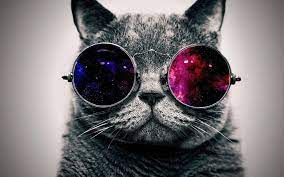

In [3]:
qt.display_pic(pic1, width=320, height=175)


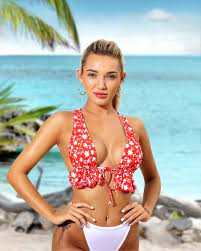

In [4]:
qt.display_pic(pic2, width=220, height=75)


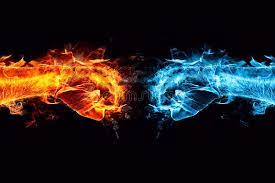

In [5]:
qt.display_pic(pic3)#, width=420, height=275)

In [6]:
qt.cs_hypothesis()


    
    **Set Hypothesis**  

    * One Tail (```<= | >```) or Two Tails (```== | !=```)?
        * two_tail (feature_1, feature_2)  


    * One Sample or Two Samples?    
        * two_sample (feature_1, feature_2)  


    * Continuous or Discreat?  
        * Discreat (feature_1) vs Discreat (feature_2) = **$Chi^2$**
            * T-Test = ```Discreat``` vs ```Continuous```  
            * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
            * $Chi^2$ = ```Discreat``` vs ```Discreat```  


    * $𝐻_0$: The opposite of what I am trying to prove  
        * $H_{0}$: feature_1 **is NOT** ```dependent``` on feature_2  
        * ```feature_1``` != ```feature_2```  


    * $𝐻_𝑎$: What am I trying to prove  
        * $H_{a}$: feature_1 **is** ```dependent``` on feature_2  
        * ```feature_1``` == ```feature_2```
        
    


**Set Hypothesis**  

* One Tail (```<= | >```) or Two Tails (```== | !=```)?
    * two_tail (gender, been_manager)  


* One Sample or Two Samples?
    * two_sample (gender, been_manager)  


* Continuous or Discreat?  
    * Discreat (gender) vs Discreat (been_manager) = **$Chi^2$**
    * T-Test = ```Discreat``` vs ```Continuous```  
    * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
    * $Chi^2$ = ```Discreat``` vs ```Discreat```  


* $𝐻_0$: The opposite of what I am trying to prove  
    * $H_{0}$: The employee gender **is NOT** ```dependent``` on whether the employee has been a manager  
    * ```employees.gender ``` != ```employees.been_manager```  


* $𝐻_𝑎$: What am I trying to prove  
    * $H_{a}$: The employee gender **is** ```dependent``` on whether the employee has been a manager  
    * ```employees.gender ``` == ```employees.been_manager```


In [7]:
qt.cs_train_val_test()


    _______________________________________________________________  
    |                              DF                             |  
    |-------------------+-------------------+---------------------|  
    |       Train       |       Validate    |          Test       |  
    +-------------------+-------------------+-----------+---------+  
    | x_train | y_train |   x_val  |  y_val |   x_test  |  y_test |  
    +-------------------------------------------------------------+  
     
    * 1. tree_1 = DecisionTreeClassifier(max_depth = 5)  
    * 2. tree_1.fit(x_train, y_train)  
    * 3. predictions = tree_1.predict(x_train)  
    * 4. pd.crosstab(y_train, predictions)  
    * 5. val_predictions = tree_1.predict(x_val)  
    * 6. pd.crosstab(y_val, val_predictions)  

    


In [8]:
qt.cs_confusion_matrix()


    
    POSITIVE (+) = insert Positive statement here  
    NEGATIVE (-) = insert Negative statement here    
     
    RECALL    
    TP / (TP + FN)    
    Use for less Type II errors when FN is worst outcome    
    Maximize for RECALL if Cost of FN > Cost of FP    
     
    PRECISION    
    TP / (TP + FP)    
    Use for less Type I errors when FP is worst outcome    
    Maximize for PRECISION if Cost of FP > Cost of FN    
     
    ACCURACY    
    (TP + TN)/(FP+FN+TP+TN)    
    prediction TRUE / total    
    Maximize for ACCURACY if neither RECALL or PRECISION outweigh eachother  
    
    Classification Confusion Matrix (actual_col, prediction_row)(Positive_first, Negative_second)  
                          +------------------------------------------+  
                          | actual Positive (+) | actual Negative(-) |  
    +---------------------+---------------------+--------------------+  
    |  pred Positive (+)  |     TP              |     FP (Type I)    |  
 

In [9]:
qt.cell_color()


    
    <div class="alert alert-info"> </div> - Change Cell color to BLUE
    <div class="alert alert-success"> </div> - Change Cell color to GREEN
    <div class="alert alert-warning"> </div> - Change Cell color to YELLOW
    <div class="alert alert-danger"> </div> - Change Cell color to RED
    ! (followed by terminal command) - Run terminal code in current directory
    %who - displays all assigned variables
   
    


In [10]:
qt.TOC()

IMPORTS
* imports() - Prints a list of standard import functions that can be quickly copy pasted for use.

TIPS & TRICKS
* explore_tips() - Displays useful code tips for exploration.

JUPYTER MARK UP
* cell_color() - Prints a short list of Jupyter Workbook markup code to change cell colors.
* display_pic(url, width, height) - Display a picture from a stored location

CHEAT SHEETS (cs_)
* cs_confusion_matrix() - Displays Cheat Sheet to help understand and read a confusion matrix.
* cs_hypothesis() - Displays Cheat Sheet to help create and test Hypothesis.
* cs_train_val_test - Display Cheat Sheet that shows graphic for train/test/split and Xy_split with steps to be performed for modeling.




In [ ]:
%who

In [ ]:
qt.imports()

# Imports

In [ ]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
from xml.etree import ElementTree

import matplotlib.pyplot as plt
# Only works inside notebook
%matplotlib inline 
#import matplotlib as mpl
#mpl.rcParams['agg.path.chunksize'] = 10000 # assists with processor speed

# import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

from sklearn.neighbors import KNeighborsClassifier

# import helper files from local environment
from env import user, password, host
import QMCBT_00_quicktips as qt
import QMCBT_01_acquire as acquire
import QMCBT_02_prepare as prepare
import QMCBT_03_explore as explore
import QMCBT_04_model as model
import QMCBT_05_evaluate as evaluate
import QMCBT_explore_evaluate as ee
import QMCBT_wrangle as w

# allows import reload without needing to clear kernel and rerun
from importlib import reload
# reload(packagename) 

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Left Align Tables in Jupyter Notebook
from IPython.core.display import HTML
table_css = 'table {align:left;display:block}'
HTML('<style>{}</style>'.format(table_css))

<div class="alert alert-success">

# TX Hate Crimes (by Victim Type)
* https://crime-data-explorer.fr.cloud.gov/pages/docApi
* https://api.usa.gov/crime/fbi/sapi/api/hatecrime/states/TX/all/VICTIM_TYPE?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv

In [ ]:
url = 'https://api.usa.gov/crime/fbi/sapi/api/hatecrime/states/TX/all/VICTIM_TYPE?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv'
response = requests.get(url)
response

In [ ]:
response.ok

In [ ]:
response.text

In [ ]:
data = response.json()
print(type(data))
data

In [ ]:
response = requests.get(url)
print(response)
response.json()

In [ ]:
response = requests.get(url)
data = response.json()
data.keys()

In [ ]:
# Pull it all at once
response = requests.get(url)
data = response.json()

TX_hate_crimes_victim_df = pd.DataFrame(data['data'])
TX_hate_crimes_victim_df

In [ ]:
TX_hate_crimes_victim_df.key.unique()

<div class="alert alert-success">

# TX Hate Crimes (by location)
* https://crime-data-explorer.fr.cloud.gov/pages/docApi
* https://api.usa.gov/crime/fbi/sapi/api/hatecrime/states/TX/all/LOCATION?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv

In [ ]:
url = 'https://api.usa.gov/crime/fbi/sapi/api/hatecrime/states/TX/all/LOCATION?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv'
response = requests.get(url)
response

In [ ]:
response.ok

In [ ]:
response.text

In [ ]:
data = response.json()
print(type(data))
data

In [ ]:
response = requests.get(url)
print(response)
response.json()

In [ ]:
response = requests.get(url)
data = response.json()
data.keys()

In [ ]:
ui_type = data['ui_type']
noun = data['noun']
category = data['category']
title = data['title']
short_title = data['short_title']
ui_restriction = data['ui_restriction']
api_keys_column = data['keys']
api_data_column = data['data']


print(f'ui_type: {ui_type}')
print(f'noun: {noun}')
print(f'category: {category}')
print(f'title: {title}')
print(f'short_title: {short_title}')
print(f'ui_restriction: {ui_restriction}')
print(f'api_keys_column: {api_keys_column}')
print(f'api_data_column: {api_data_column}')


In [ ]:
import pandas as pd
df = pd.DataFrame(data['data'])
df

In [ ]:
df.month_num.unique()

In [ ]:
df.data_year.unique()

In [ ]:
df.data_year.value_counts()

In [ ]:
df.value.unique()

In [ ]:
df.isnull().sum()

In [ ]:
# Pull it all at once
response = requests.get(url)
data = response.json()

TX_hate_crimes_df = pd.DataFrame(data['data'])
TX_hate_crimes_df

<div class="alert alert-success">

# National Hate Crimes (by Location)
* https://crime-data-explorer.fr.cloud.gov/pages/docApi
* https://api.usa.gov/crime/fbi/sapi/api/hatecrime/national/all/LOCATION?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv

In [ ]:
url = 'https://api.usa.gov/crime/fbi/sapi/api/hatecrime/national/all/LOCATION?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv'

In [ ]:
response = requests.get(url)
response

In [ ]:
response.ok

In [ ]:
response.status_code

In [ ]:
response.text

In [ ]:
data = response.json()
print(type(data))
data

In [ ]:
response = requests.get(url)
print(response)
response.json()

In [ ]:
response = requests.get(url)

data = response.json()
data.keys()

In [ ]:
# Pull it all at once
response = requests.get(url)
data = response.json()

national_hate_crimes_df = pd.DataFrame(data['data'])
national_hate_crimes_df

<div class="alert alert-success">

# Life Expectancy
* **GHO Selections:** https://apps.who.int/gho/athena/api/GHO
* **Homepage:** https://www.who.int/data/gho/info/athena-api-examples
* **CSV Data Pull:** https://apps.who.int/gho/athena/api/GHO/WHOSIS_000001,WHOSIS_000002,WHOSIS_000003,WHOSIS_000004,WHOSIS_000005,WHOSIS_000006,WHOSIS_000007,WHOSIS_000008,WHOSIS_000009,WHOSIS_000010,WHOSIS_000012,WHOSIS_000013,WHOSIS_000014,WHOSIS_000015,WHOSIS_000016?format=csv

In [ ]:
life_Expectancy_df = pd.read_csv('../my_notes/smoking_WHOSIS000001-16.csv')

In [ ]:
life_Expectancy_df

In [ ]:
life_Expectancy_df.isnull().sum()

In [ ]:
life_Expectancy_df.YEAR.unique()

In [ ]:
life_Expectancy_df.GHO.unique()

In [ ]:
life_Expectancy_df.GHO.isnull().sum()

In [ ]:
life_Expectancy_df.GHO.value_counts()

In [ ]:
life_Expectancy_df.shape[0]

In [ ]:
print(f'WHOSIS_000004    {round(9690/39880*100,2)}%')
print(f'WHOSIS_000003    {round(9648/39880*100,2)}%')
print(f'WHOSIS_000016     {round(6262/39880*100,2)}%')
print(f'WHOSIS_000014     {round(4353/39880*100,2)}%')
print(f'WHOSIS_000002     {round(2328/39880*100,2)}%')
print(f'WHOSIS_000007     {round(2328/39880*100,2)}%')
print(f'WHOSIS_000015     {round(2328/39880*100,2)}%')
print(f'WHOSIS_000001     {round(2328/39880*100,2)}%')
print(f'WHOSIS_000006     {round(615/39880*100,2)}%')

<div class="alert alert-info">

#### About 24% of data
* 'WHOSIS_000004': 'Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)',
* 'WHOSIS_000003': 'Neonatal mortality rate (0 to 27 days) per 1000 live births)',

#### Between 10-15% of data
* 'WHOSIS_000016': 'Mortality rate among children ages 5 to 9 years (per 1000 children aged 5)', 
* 'WHOSIS_000014': 'Stillbirth rate (per 1000 total births)', 

#### These are all exactly the same record count at 5.84%
* 'WHOSIS_000001': 'Life expectancy at birth (years)', 
* 'WHOSIS_000002': 'Healthy life expectancy (HALE) at birth (years)', 
* 'WHOSIS_000007': 'Healthy life expectancy (HALE) at age 60 (years)', 
* 'WHOSIS_000015': 'Life expectancy at age 60 (years)', 

#### Very little representation at only 1.54% with just 615 records
* 'WHOSIS_000006': 'Infants exclusively breastfed for the first six months of life (%)', 

'WHOSIS_000001': 'Life expectancy at birth (years)', 
'WHOSIS_000002': 'Healthy life expectancy (HALE) at birth (years)', 
'WHOSIS_000003': 'Neonatal mortality rate (0 to 27 days) per 1000 live births) (SDG 3.2.2)',
'WHOSIS_000004': 'Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)',
'WHOSIS_000006': 'Infants exclusively breastfed for the first six months of life (%)', 
'WHOSIS_000007': 'Healthy life expectancy (HALE) at age 60 (years)', 
'WHOSIS_000014': 'Stillbirth rate (per 1000 total births)', 
'WHOSIS_000015': 'Life expectancy at age 60 (years)', 
'WHOSIS_000016': 'Mortality rate among children ages 5 to 9 years (per 1000 children aged 5)', 

|[GHO Code](https://apps.who.int/gho/athena/api/GHO)      |[Documentation](https://www.who.int/data/gho/indicator-metadata-registry)|[Global Health Observatory](https://www.who.int/data/gho) (GHO) Code Description|
|:-------------|:-----------:|:------------------------------------------------|
|WHOSIS_000001|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/65)|Life expectancy at birth (years)| 
|WHOSIS_000002|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/66)|Healthy life expectancy (HALE) at birth (years)| 
|WHOSIS_000003|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/67)|Neonatal mortality rate (0 to 27 days) per 1000 live births)|
|WHOSIS_000004|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/64)|Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)|
|WHOSIS_000006|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/130)|Infants exclusively breastfed for the first six months of life (%)| 
|WHOSIS_000007|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/3443)|Healthy life expectancy (HALE) at age 60 (years)| 
|WHOSIS_000014|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2444)|Stillbirth rate (per 1000 total births)| 
|WHOSIS_000015|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2977)|Life expectancy at age 60 (years)| 
|WHOSIS_000016|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/5669)|Mortality rate among children ages 5 to 9 years (per 1000 children aged 5)| 


In [ ]:
life_Expectancy_df.PUBLISHSTATE.unique()

In [ ]:
life_Expectancy_df.Numeric.unique()

In [ ]:
life_Expectancy_df.COUNTRY.nunique()

In [ ]:
life_Expectancy_df.COUNTRY.unique()

In [ ]:
life_Expectancy_df.COUNTRY.isnull().sum()

In [ ]:
life_Expectancy_df.COUNTRY.isnull().sum() / smoking_df.shape[0]

In [ ]:
life_Expectancy_df.SEX.isnull().sum()

In [ ]:
life_Expectancy_df.SEX.isnull().sum() / smoking_df.shape[0]

In [ ]:
life_expectancy_df = smoking_df[(smoking_df['GHO'] == 'WHOSIS_000001') |
                                (smoking_df['GHO'] == 'WHOSIS_000002') |
                                (smoking_df['GHO'] == 'WHOSIS_000007') |
                                (smoking_df['GHO'] == 'WHOSIS_000015')
                               ]

In [ ]:
life_expectancy_df

In [ ]:
life_expectancy_df.GHO.unique()

<div class="alert alert-success">

# Infant Mortality
* **GHO Selections:** https://apps.who.int/gho/athena/api/GHO
* **Homepage:** https://www.who.int/data/gho/info/athena-api-examples
* **CSV Data Pull:** https://apps.who.int/gho/athena/api/GHO/MDG_0000000001,MDG_0000000003,MDG_0000000005,MDG_0000000007,MDG_0000000025,MDG_0000000026?format=csv

In [ ]:
infant_mortality_df = pd.read_csv('../my_notes/infant_mortality.csv')

In [ ]:
infant_mortality_df

In [ ]:
infant_mortality_df.isnull().sum()

In [ ]:
infant_mortality_df.YEAR.unique()

In [ ]:
infant_mortality_df.GHO.unique()

In [ ]:
infant_mortality_df.GHO.isnull().sum()

In [ ]:
infant_mortality_df.GHO.value_counts()

In [ ]:
infant_mortality_df.shape[0]

In [ ]:
print(f'MDG_0000000007    {round(36084/82935*100,2)}%')
print(f'MDG_0000000001    {round(35933/82935*100,2)}%')
print(f'MDG_0000000003     {round(5345/82935*100,2)}%')
print(f'MDG_0000000026     {round(3420/82935*100,2)}%')
print(f'MDG_0000000025     {round(2153/82935*100,2)}%')

<div class="alert alert-info">

#### Over 35K value counts
* 'MDG_0000000007': 'Under-five mortality rate (per 1000 live births)', 
* 'MDG_0000000001': 'Infant mortality rate (between birth and 11 months per 1000 live births)', 

#### Between 2-5k value counts
* 'MDG_0000000003': 'Adolescent birth rate (per 1000 women)', 
* 'MDG_0000000026': 'Maternal mortality ratio (per 100 000 live births)', 
* 'MDG_0000000025': 'Births attended by skilled health personnel (%)', 

#### MDG...05 returned no data
* 'MDG_0000000005': 'Contraceptive prevalence (%)', 

'MDG_0000000001': 'Infant mortality rate (between birth and 11 months per 1000 live births)', 
'MDG_0000000003': 'Adolescent birth rate (per 1000 women)', 
'MDG_0000000005': 'Contraceptive prevalence (%)', 
'MDG_0000000007': 'Under-five mortality rate (per 1000 live births)', 
'MDG_0000000025': 'Births attended by skilled health personnel (%)', 
'MDG_0000000026': 'Maternal mortality ratio (per 100 000 live births)', 

|[GHO Code](https://apps.who.int/gho/athena/api/GHO)      |[Documentation](https://www.who.int/data/gho/indicator-metadata-registry)|[Global Health Observatory](https://www.who.int/data/gho) (GHO) Code Description|
|:-------------|:-----------:|:------------------------------------------------|
|MDG_0000000001|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/1)|Infant mortality rate (between birth and 11 months per 1000 live births)| 
|MDG_0000000003|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/4669)|Adolescent birth rate (per 1000 women)| 
|MDG_0000000005|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/5)|Contraceptive prevalence (%)| 
|MDG_0000000007|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/7)|Under-five mortality rate (per 1000 live births)| 
|MDG_0000000025|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/25)|Births attended by skilled health personnel (%)| 
|MDG_0000000026|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/26)|Maternal mortality ratio (per 100 000 live births)| 

In [ ]:
infant_mortality_df.PUBLISHSTATE.unique()

In [ ]:
infant_mortality_df.Numeric.unique()

In [ ]:
infant_mortality_df.COUNTRY.nunique()

In [ ]:
infant_mortality_df.COUNTRY.unique()

In [ ]:
infant_mortality_df.COUNTRY.isnull().sum()

In [ ]:
infant_mortality_df.COUNTRY.isnull().sum() / smoking_df.shape[0]

In [ ]:
infant_mortality_df.SEX.isnull().sum()

In [ ]:
infant_mortality_df.SEX.isnull().sum() / smoking_df.shape[0]

<div class="alert alert-success">

# Life Expectancy from Online Example
* **GHO Selections:** https://apps.who.int/gho/athena/api/GHO
* **Homepage:** https://www.who.int/data/gho/info/athena-api-examples
* **CSV Data Pull:** https://apps.who.int/gho/athena/api/GHO/WHOSIS_000001,WHOSIS_000015?format=csv
* **Online Example:** https://apps.who.int/gho/athena/api/GHO/WHOSIS_000001,WHOSIS_000015?filter=COUNTRY:*&x-sideaxis=COUNTRY;YEAR&x-topaxis=GHO;SEX&profile=verbose&format=csv

In [ ]:
# load WHO longevity data
# http://apps.who.int/gho/data/node.main.688
who_list = pd.read_csv('online_example.csv')

In [ ]:
who_list.T

In [ ]:
who_list['YEAR (CODE)'].unique()

In [ ]:
who_list['REGION (DISPLAY)'].unique()

In [ ]:
who_list['COUNTRY (DISPLAY)'].nunique()

In [ ]:
who_list['SEX (DISPLAY)'].unique()

<div class="alert alert-success">

# Checkpoint #1

1. a brief (one-sentence) description of your project
* Predict future Life Expectancy or Healthy Life Expectancy

2. a link to the data source
* **GHO Selections:** https://apps.who.int/gho/athena/api/GHO
* **Homepage:** https://www.who.int/data/gho/info/athena-api-examples
* **CSV Data Pull:** https://apps.who.int/gho/athena/api/GHO/WHOSIS_000001,WHOSIS_000002,WHOSIS_000003,WHOSIS_000004,WHOSIS_000005,WHOSIS_000006,WHOSIS_000007,WHOSIS_000008,WHOSIS_000009,WHOSIS_000010,WHOSIS_000012,WHOSIS_000013,WHOSIS_000014,WHOSIS_000015,WHOSIS_000016?format=csv 

3. your target variable
* Numeric (Expected Years of continued Life)

4. what one observation represents
* Numeric for one year in specified country according to category of life expectancy
    * 'WHOSIS_000001': 'Life expectancy at birth (years)', 
    * 'WHOSIS_000002': 'Healthy life expectancy (HALE) at birth (years)', 
    * 'WHOSIS_000007': 'Healthy life expectancy (HALE) at age 60 (years)', 
    * 'WHOSIS_000015': 'Life expectancy at age 60 (years)', 


<div class="alert alert-danger">

# Sometimes it is faster to read the unreadable data than it is to read about how to make the data readable!

# Additional Web Resources on Life Expectancy
* https://towardsdatascience.com/time-left-to-live-modeling-life-expectancy-and-prototyping-it-on-the-web-with-flask-and-68e3a8fa0fe4
* https://www.freecodecamp.org/news/regression-analysis-on-life-expectancy/